In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context="talk", style="ticks", rc=rc)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [15]:
file_path = 'ÈôÑ‰ª∂1 Ëøë5Âπ¥402ÂÆ∂‰æõÂ∫îÂïÜÁöÑÁõ∏ÂÖ≥Êï∞ÊçÆ.xlsx'

order_df = pd.read_excel(file_path, sheet_name='‰ºÅ‰∏öÁöÑËÆ¢Ë¥ßÈáèÔºàm¬≥Ôºâ')
supply_df = pd.read_excel(file_path, sheet_name='‰æõÂ∫îÂïÜÁöÑ‰æõË¥ßÈáèÔºàm¬≥Ôºâ')

order_df.head()

‰æõÂ∫îÂïÜID ÊùêÊñôÂàÜÁ±ª  W001  W002  W003  W004  W005  W006  W007  W008  ...  W231  W232  \
0  S001    B     0     0     0    43     0     0     0     0  ...     1     0   
1  S002    A     1     1     0     1     0     0     0     0  ...     0     0   
2  S003    C     7     1     0     0     0     1     4    50  ...    10     3   
3  S004    B     0     1     1   100     0    85     0     0  ...     1     0   
4  S005    A    30    60    60    60    70    70    60    70  ...    80    70   

   W233  W234  W235  W236  W237  W238  W239  W240  
0     0     1     0     1     0     0     0     0  
1     1     0     0     0     1     1     0     1  
2    50    20    20     7    10     9    20    10  
3     1     0     0     0     0     1     0     0  
4    70    70    70    70    70    70    70    80  

[5 rows x 242 columns]

In [16]:
top_50_suppliers = pd .read_excel("TOPSISÂâç50ÂÆ∂‰æõÂ∫îÂïÜ.xlsx")
top_50_ids = top_50_suppliers['‰æõÂ∫îÂïÜÁºñÂè∑'].head(50).tolist()

# SARIMA

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


def predict_supplier_supply_next_24_weeks(supplier_id, supply_df, plot=True):
    row = supply_df[supply_df.iloc[:, 0] == supplier_id]
    if row.empty:
        raise ValueError(f"Êú™Âú®‰æõË¥ßÈáèË°®‰∏≠ÊâæÂà∞‰æõÂ∫îÂïÜ {supplier_id}")
    supply_series = row.iloc[0, 2:].astype(float).values
    weeks = pd.date_range(start='2017-01-01', periods=len(supply_series), freq='W')
    supply_ts = pd.Series(supply_series, index=weeks)
    order = (1, 1, 1) 
    seasonal_order = (1, 1, 1, 48)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = SARIMAX(supply_ts, order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)

    forecast = results.get_forecast(steps=24)
    predicted_supply = forecast.predicted_mean.values
    predicted_supply = np.where(predicted_supply < 0, 0, predicted_supply).astype(int)
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(supply_ts[-100:], label='ÂéÜÂè≤‰æõË¥ßÈáè', marker='o', markersize=3)
        future_index = pd.date_range(start=supply_ts.index[-1], periods=25, freq='W')[1:]
        plt.plot(future_index, forecast.predicted_mean, label='È¢ÑÊµã‰æõË¥ßÈáè', color='r', linestyle='--', marker='x', markersize=4)
        pred_ci = forecast.conf_int()
        plt.fill_between(future_index,
                         pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                         color='pink', alpha=0.3, label='95% ÁΩÆ‰ø°Âå∫Èó¥')
        plt.title(f'‰æõÂ∫îÂïÜ {supplier_id} ÁöÑ‰æõË¥ßÈáèÈ¢ÑÊµã')
        plt.xlabel('Êó∂Èó¥')
        plt.ylabel('‰æõË¥ßÈáè ($m^3$)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return predicted_supply

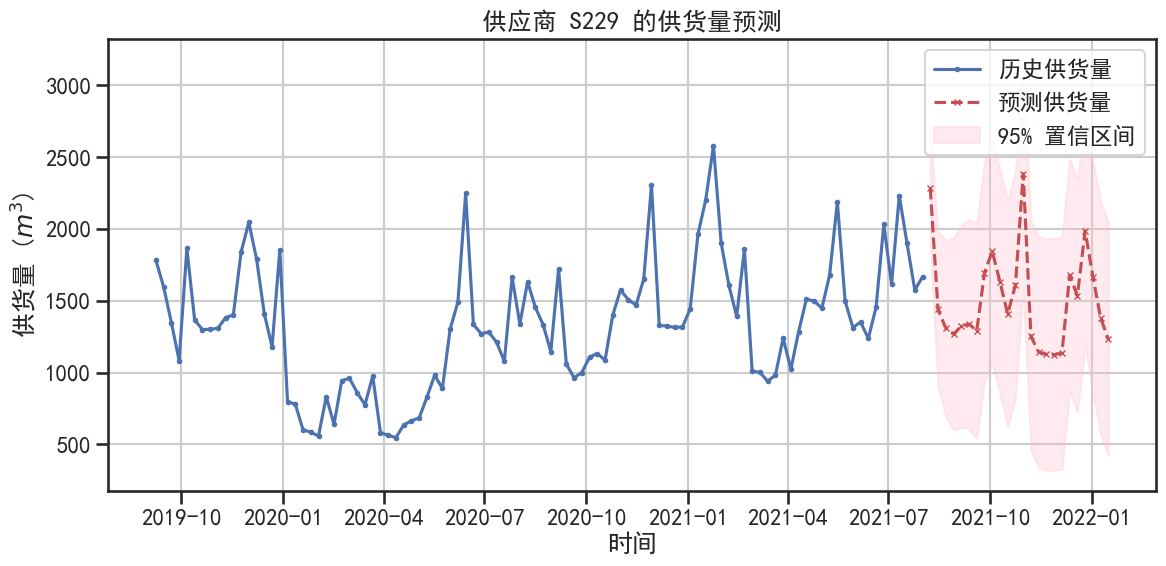

S229Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [2285 1439 1309 1267 1321 1336 1291 1691 1844 1630 1406 1609 2382 1251
 1142 1126 1124 1134 1676 1534 1984 1666 1379 1230]


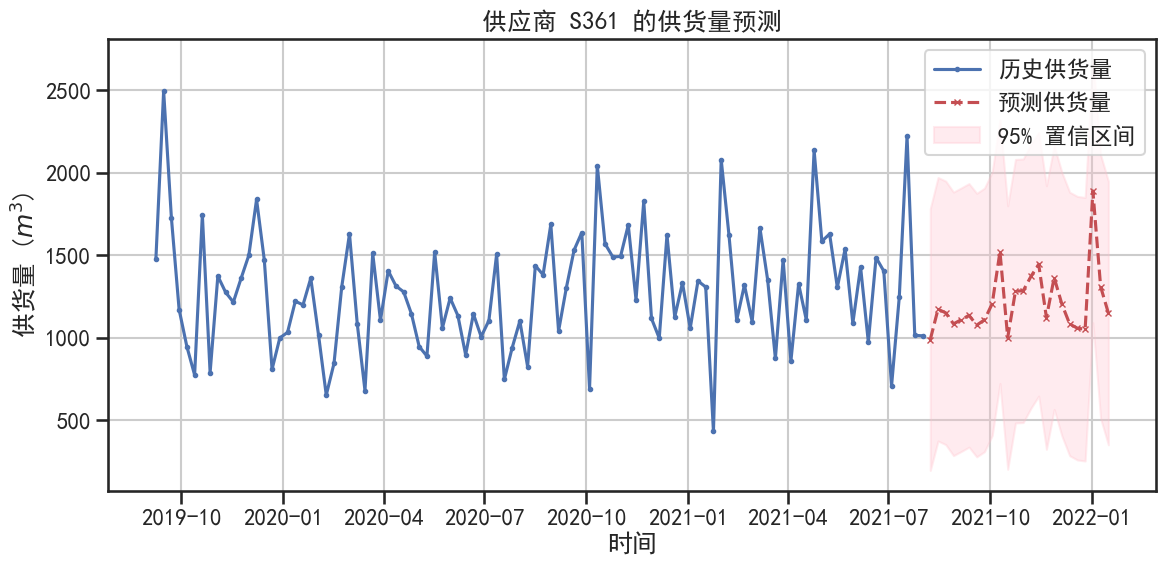

S361Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 989 1173 1151 1084 1109 1136 1077 1108 1206 1521 1001 1282 1284 1371
 1445 1122 1364 1203 1083 1058 1051 1889 1309 1149]


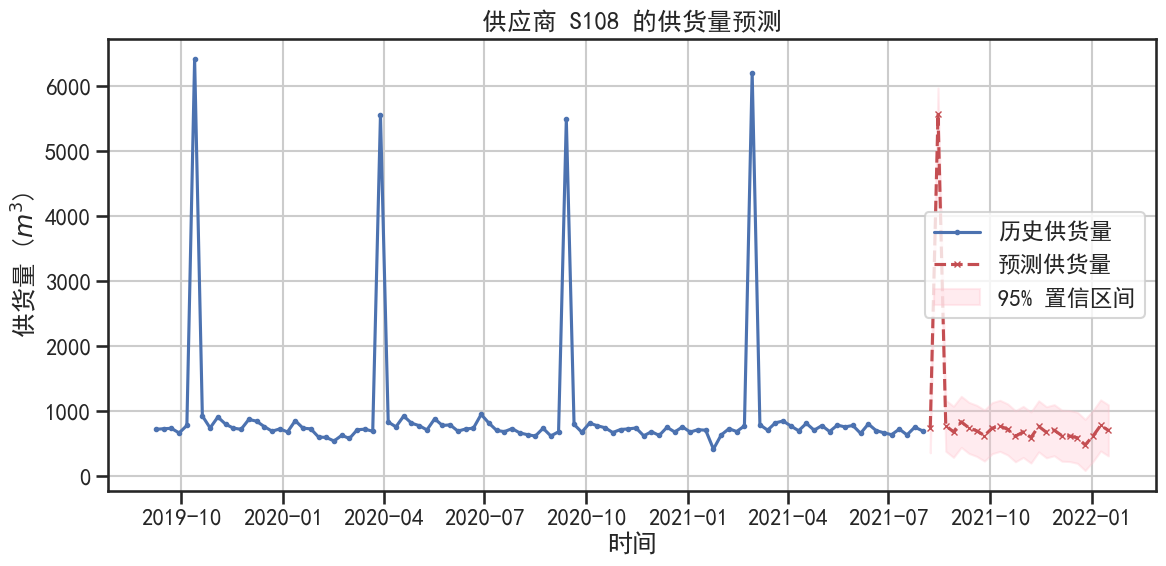

S108Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 748 5580  776  682  837  743  698  626  740  775  719  614  682  595
  767  676  708  624  618  592  481  616  781  705]


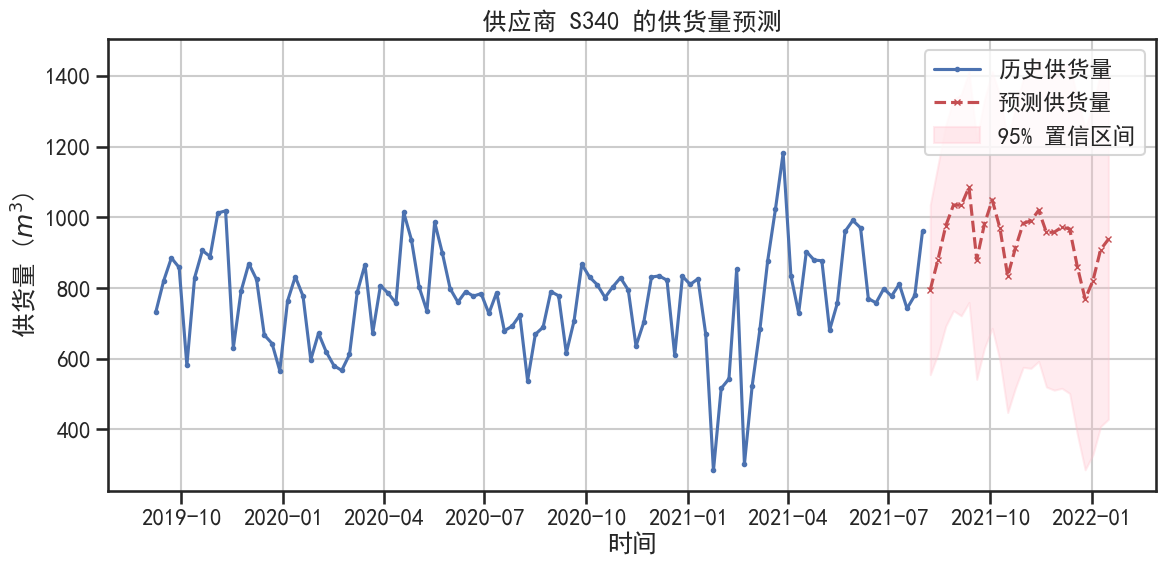

S340Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 794  880  975 1034 1033 1084  880  981 1048  968  833  913  982  989
 1019  957  957  972  966  859  769  819  908  937]


In [6]:
for i in range(4):
    supplier_id = top_50_ids[i]
    forecast_supply = predict_supplier_supply_next_24_weeks(supplier_id, supply_df)
    print(f"{ supplier_id}Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö", forecast_supply)

## È¢ÑÊµãTOP50‰æõË¥ßÂïÜÁöÑ‰æõË¥ßÈáè

In [12]:
future_weeks = [f'W{i}' for i in range(241, 265)]  # W241~W264
result_df = pd.DataFrame(columns=['‰æõÂ∫îÂïÜÁºñÂè∑', 'ÊùêÊñôÂàÜÁ±ª'] + future_weeks)

top_50_ids = top_50_suppliers['‰æõÂ∫îÂïÜÁºñÂè∑'].tolist()
top_50_supply_sorted = pd.DataFrame()

for supplier_id in top_50_ids:
    match_row = supply_df[supply_df.iloc[:, 0] == supplier_id]
    if not match_row.empty:
        top_50_supply_sorted = pd.concat([top_50_supply_sorted, match_row], ignore_index=True)

for idx in tqdm(range(len(top_50_supply_sorted)), desc="È¢ÑÊµã‰æõÂ∫îÂïÜ‰æõË¥ßÈáè"):
    row = top_50_supply_sorted.iloc[idx]
    supplier_id = row.iloc[0]
    category = row.iloc[1]

    try:
        prediction = predict_supplier_supply_next_24_weeks(supplier_id, supply_df,  plot=False)
        new_row = pd.DataFrame([[
            supplier_id,
            category,
            *prediction.tolist()
        ]], columns=result_df.columns)

        result_df = pd.concat([result_df, new_row], ignore_index=True)

    except Exception as e:
        print(f"error: {e}")

È¢ÑÊµã‰æõÂ∫îÂïÜ‰æõË¥ßÈáè: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [05:35<00:00,  6.70s/it]


In [13]:
result_df.to_excel("‰æõÂ∫îÂïÜ‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûú.xlsx", index=False) # ‰øùÂ≠ò

# SARIMAËÆ¢Ë¥ßÈáèÔºàABCÔºâ

In [17]:
week_columns = [f'W{i:03d}' for i in range(1, 241)]
abc_order_data = order_df.groupby('ÊùêÊñôÂàÜÁ±ª')[week_columns].sum().loc[['A', 'B', 'C']]
weeks = pd.date_range(start='2017-01-01', periods=240, freq='W')
abc_order_ts = pd.DataFrame({
    'A': abc_order_data.loc['A'].values,
    'B': abc_order_data.loc['B'].values,
    'C': abc_order_data.loc['C'].values
}, index=weeks)

In [18]:
abc_order_ts

A      B      C
2017-01-01  5745   8322   4425
2017-01-08  3476  10939   4889
2017-01-15  2902  10828   5162
2017-01-22  5550   6363   6806
2017-01-29  4031  19436   4240
...          ...    ...    ...
2021-07-04  7936   4549   6213
2021-07-11  6555   3368  29184
2021-07-18  5639   3142  19132
2021-07-25  5386   3271  10470
2021-08-01  4861   4605  11561

[240 rows x 3 columns]

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def predict_weekly_order_for_category(ts_series, steps=24, order=(1, 1, 1), seasonal_order=(2, 1, 1, 48)):
    model = SARIMAX(ts_series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=steps)
    predicted_mean = forecast.predicted_mean.values
    predicted_mean = np.where(predicted_mean < 0, 0, predicted_mean)  # ÊõøÊç¢Ë¥üÂÄº‰∏∫0
    return forecast.predicted_mean, forecast.conf_int()

In [44]:
warnings.filterwarnings("ignore")
future_weeks = pd.date_range(start=weeks[-1] + pd.Timedelta(days=7), periods=24, freq='W')
predicted_means = {}
conf_ints = {}

for category in ['A', 'B', 'C']:
    mean, ci = predict_weekly_order_for_category(abc_order_ts[category], steps=24)
    predicted_means[category] = mean.values
    conf_ints[category] = ci.values

predicted_df = pd.DataFrame({f'{cat}Á±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè': predicted_means[cat] for cat in ['A', 'B', 'C']}, index=future_weeks)
new_index = [f"W{i}" for i in range(241, 265)]
predicted_df["Week"] = new_index
print(predicted_df)
predicted_df.to_excel("È¢ÑÊµãËÆ¢Ë¥ßÈáèÁªìÊûú.xlsx", index=False)

                 AÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè       BÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè       CÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè  Week
2021-08-08   6629.940362  26211.924104   9321.066568  W241
2021-08-15   9351.314320  10900.585938   8664.049586  W242
2021-08-22   3505.683116  12823.655304   9483.745336  W243
2021-08-29   7000.331804  10647.890331   8922.509858  W244
2021-09-05   4156.916101  21913.195887   8009.364333  W245
2021-09-12   9014.905569   5063.066412   8370.965464  W246
2021-09-19  11269.777264   8298.737068   9080.181949  W247
2021-09-26   6870.163993   9738.798144   9352.137132  W248
2021-10-03   6042.388790  14288.827855   9322.746170  W249
2021-10-10  14640.297393   9097.418288  10453.602355  W250
2021-10-17   6183.845870   5509.906701  12248.060365  W251
2021-10-24   7713.085655   6019.879310  12477.980362  W252
2021-10-31   7832.005213  11639.691519  10812.308666  W253
2021-11-07   6202.374517   4505.185428  11390.615427  W254
2021-11-14   5415.117212   5893.805815  12333.358356  W255
2021-11-21   6586.56

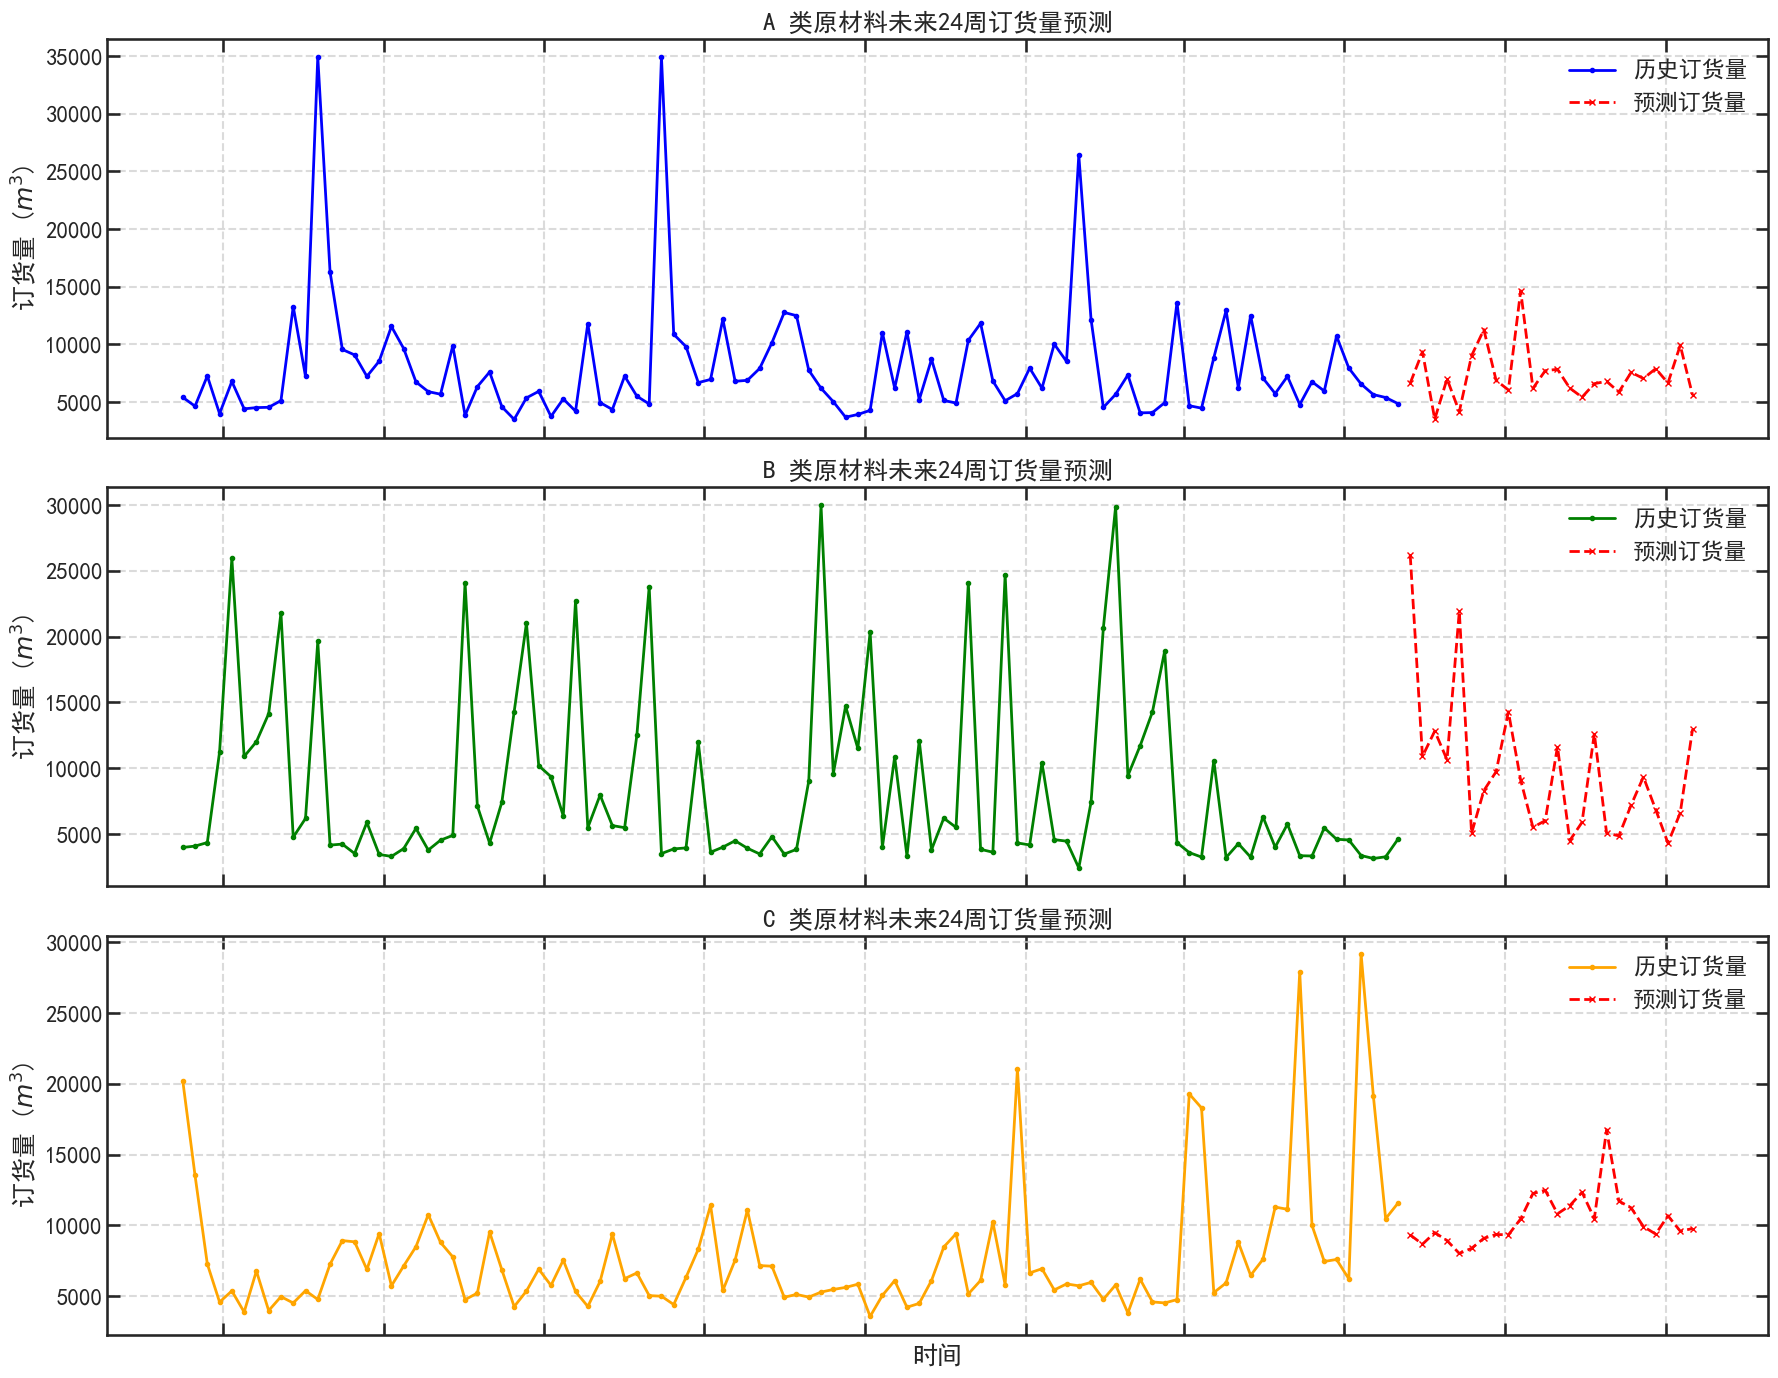

In [45]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'legend.frameon': False,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
})
fig, axes = plt.subplots(3, 1, figsize=(18, 14), sharex=True)
colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
categories = ['A', 'B', 'C']

for ax, category in zip(axes, categories):
    ax.plot(abc_order_ts.index[-100:], abc_order_ts[category][-100:], label='ÂéÜÂè≤ËÆ¢Ë¥ßÈáè', color=colors[category], marker='o', markersize=3)
    future_index = predicted_df.index
    ax.plot(future_index, predicted_df[f'{category}Á±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè'], label='È¢ÑÊµãËÆ¢Ë¥ßÈáè', color='red', linestyle='--', marker='x', markersize=5)

    ax.set_title(f'{category} Á±ªÂéüÊùêÊñôÊú™Êù•24Âë®ËÆ¢Ë¥ßÈáèÈ¢ÑÊµã')
    ax.set_ylabel('ËÆ¢Ë¥ßÈáè ($m^3$)')
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_ticklabels([])

plt.xlabel("Êó∂Èó¥")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Âπ≥ÂùáÊçüËÄóÈáèÊõ≤Á∫ø

In [19]:
loss_df = pd.read_excel("ÈôÑ‰ª∂2 Ëøë5Âπ¥8ÂÆ∂ËΩ¨ËøêÂïÜÁöÑÁõ∏ÂÖ≥Êï∞ÊçÆ.xlsx")
week_columns = [f'W{i:03d}' for i in range(1, 241)]
loss_data = loss_df[week_columns].values.T
weeks = pd.date_range(start='2017-01-01', periods=240, freq='W')
loss_ts = pd.DataFrame(loss_data, index=weeks, columns=loss_df['ËΩ¨ËøêÂïÜID'])
weekly_avg_loss = loss_ts.mean(axis=1)
avg_loss_series = pd.Series(weekly_avg_loss.values, index=weekly_avg_loss.index)

mean = avg_loss_series.mean()
std = avg_loss_series.std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers = (avg_loss_series < lower_bound) | (avg_loss_series > upper_bound) # Ë∂ÖËøáÊ†áÂáÜÂ∑Æ3ÂÄçÁöÑÁÇπÔºåËÆ§‰∏∫ÊòØÂºÇÂ∏∏ÂÄº
cleaned_series = avg_loss_series.copy()
cleaned_series[outliers] = mean

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_forecast(ts_series, steps=24):
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 48)
    model = SARIMAX(ts_series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=steps)
    predicted_mean = forecast.predicted_mean.values
    return predicted_mean

predicted_loss = sarima_forecast(cleaned_series, steps=24)

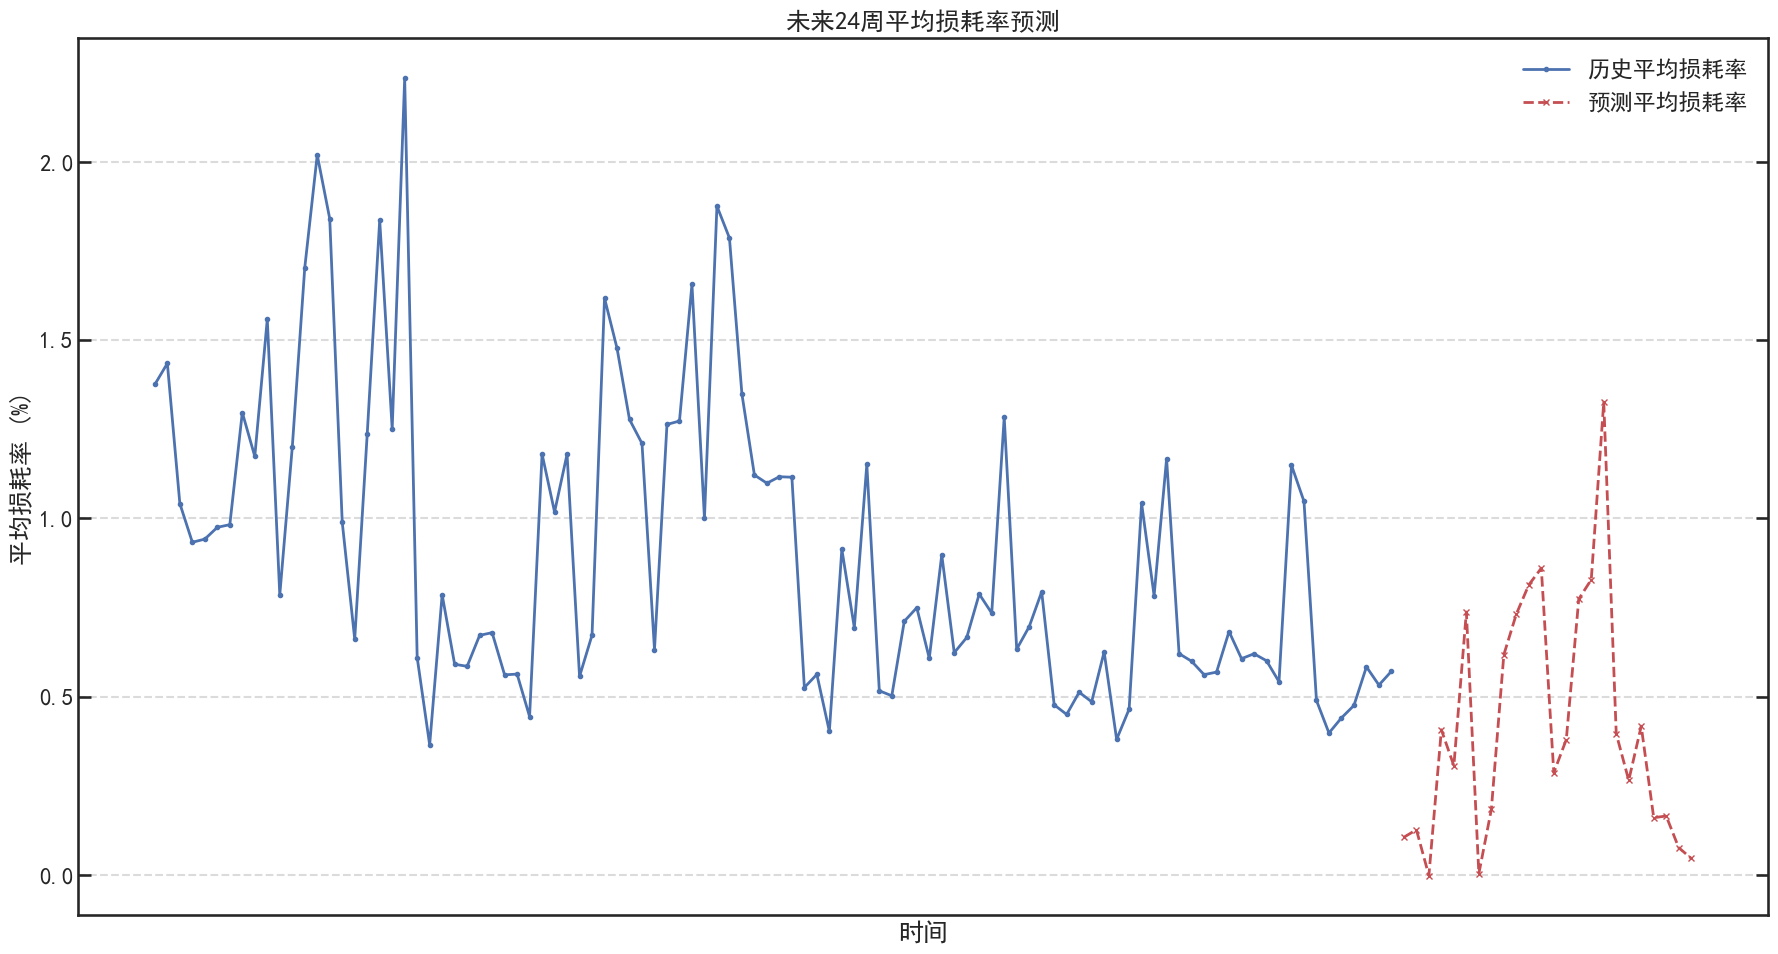

    Week  È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)
0   W241     0.105230
1   W242     0.126325
2   W243    -0.002182
3   W244     0.406800
4   W245     0.306012
5   W246     0.737297
6   W247     0.003232
7   W248     0.183151
8   W249     0.617434
9   W250     0.731347
10  W251     0.813538
11  W252     0.860246
12  W253     0.286387
13  W254     0.379258
14  W255     0.773695
15  W256     0.828168
16  W257     1.326219
17  W258     0.395572
18  W259     0.264963
19  W260     0.417006
20  W261     0.160060
21  W262     0.164877
22  W263     0.076114
23  W264     0.046109


In [28]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'legend.frameon': False,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
})

future_index = pd.date_range(start=weeks[-1] + pd.Timedelta(days=7), periods=24, freq='W')

plt.figure(figsize=(18, 10))
plt.plot(cleaned_series[-100:], label='ÂéÜÂè≤Âπ≥ÂùáÊçüËÄóÁéá', marker='o', markersize=3)
plt.plot(future_index, predicted_loss, label='È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá', color='r', linestyle='--', marker='x', markersize=5)

plt.title("Êú™Êù•24Âë®Âπ≥ÂùáÊçüËÄóÁéáÈ¢ÑÊµã")
plt.xlabel("Êó∂Èó¥")
plt.ylabel("Âπ≥ÂùáÊçüËÄóÁéá (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.show()

new_index = [f"W{i}" for i in range(241, 265)]
loss_predicted_df = pd.DataFrame({
    'Week': new_index,
    'È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)': predicted_loss
})
print(loss_predicted_df)

# ÈÅó‰º†ÁÆóÊ≥ïÊúÄ‰ºòÂåñ

In [29]:
df_demand = pd.read_excel("È¢ÑÊµãËÆ¢Ë¥ßÈáèÁªìÊûú.xlsx")
demand_A = df_demand["AÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
demand_B = df_demand["BÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
demand_C = df_demand["CÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
loss_rates = loss_predicted_df["È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)"].values
df_suppliers = pd.read_excel("‰æõÂ∫îÂïÜ‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûú.xlsx")
supplier_ids = df_suppliers["‰æõÂ∫îÂïÜÁºñÂè∑"].tolist()
materials = df_suppliers["ÊùêÊñôÂàÜÁ±ª"].tolist()
weeks = [f"W{i}" for i in range(241, 265)]
supply_data = df_suppliers[weeks].values 

In [30]:
def get_supply(individual, week):
    # ËÆ°ÁÆóËØ•‰∏™‰ΩìÂú®Á¨¨ week Âë®ÂØπ A/B/C ÁöÑÊÄª‰æõË¥ßÈáè
    supply = {"A": 0, "B": 0, "C": 0}
    selected = [i for i in range(50) if individual[i] == 1]
    for idx in selected:
        mat = materials[idx]
        supply[mat] += supply_data[idx][week]
    return supply

In [31]:
get_supply(np.ones(50), 0 )

{'A': 7443, 'B': 26947, 'C': 8580}

In [80]:
sum_supply = supply_data.sum(axis = 0)
sum_demand = df_demand.iloc[:,:-1].sum(axis = 1).values

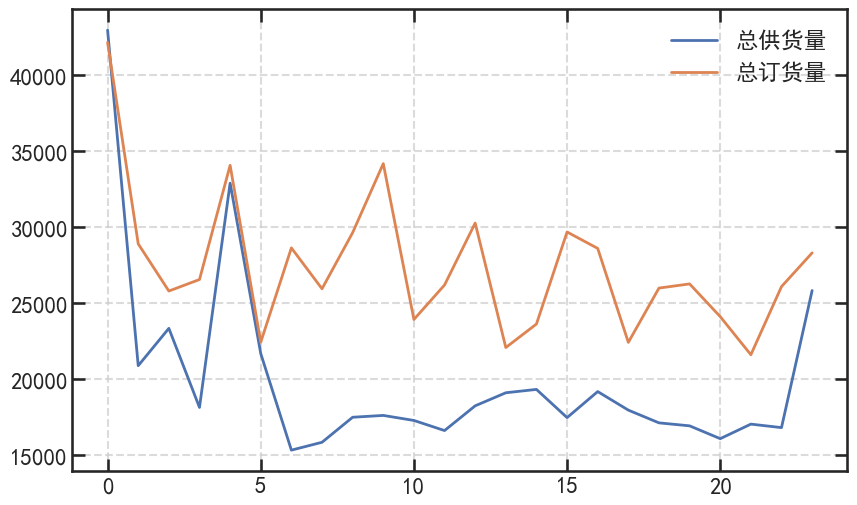

In [83]:
plt.figure(figsize=(10,6))
plt.plot(sum_supply, label="ÊÄª‰æõË¥ßÈáè")
plt.plot(sum_demand, label="ÊÄªËÆ¢Ë¥ßÈáè")    
plt.legend()
plt.show()

### ‰∏∫‰ªÄ‰πàÂá∫Áé∞‰∫Ü‰∏äÈù¢ÁöÑÊÉÖÂÜµÔºü
Âõ†‰∏∫Êàë‰ª¨ÁöÑ‰æõË¥ßÂïÜÂè™ÈÄâÊã©‰∫ÜTOP50Ôºå‰ΩÜÊòØËÆ¢Ë¥ßÈáèÊòØÊåâÁÖßÊâÄÊúâ‰æõË¥ßÂïÜÁöÑËÆ¢ÂçïÈáèÁ¥ØÂä†ÂæóÂà∞ÁöÑ„ÄÇ‰∏ÄÂÖ±402ÂÆ∂‰æõË¥ßÂïÜÔºåËôΩÁÑ∂TOP50‰æõË¥ßÂ§öÔºå‰ΩÜÊòØÂâ©‰∏ã352ÂÆ∂‰æõË¥ßÂïÜÁöÑ‰πüÊèê‰æõ‰∫ÜÂæàÂ§ö‰æõË¥ßÈáèÔºÅÔºÅÁî®50ÂÆ∂‰∏≠ÈÄâ‰∏Ä‰∫õÊù•Êª°Ë∂≥ÂéüÊú¨Ë¶Å402ÂÆ∂‰æõË¥ßÂïÜËÆ¢Ë¥ßÈáèÁöÑÈúÄÊ±ÇÊòØËÇØÂÆö‰∏çË°åÁöÑ„ÄÇ

In [57]:
def fitness(individual, week):
    loss = loss_rates[week]
    demand = {
        "A": demand_A[week],
        "B": demand_B[week],
        "C": demand_C[week]
    }
    # CÊù•‰ª£Ë°®
    supply = get_supply(individual, week)

    received_A = supply["A"] * (1 - loss)
    received_B = supply["B"] * (1 - loss)
    received_C = supply["C"] * (1 - loss)


    shortage_penalty = 0
    
    if received_A < demand["A"] * 0.9 and received_B < demand["B"] * 0.9 and received_C < demand["C"] * 0.9:
        shortage_penalty += demand["A"] + demand["B"]  + demand["C"] -  received_A - received_B - received_C + 50

    
    if shortage_penalty == 0:
        return sum(individual)  # ÊàêÊú¨Ôºö‰æõÂ∫îÂïÜÊï∞Èáè
    else:
        return shortage_penalty

In [52]:
def genetic_algorithm(week, pop_size=10, generations=500, mutation_rate=0.05):

    print(f"\n=== ÂºÄÂßãÂ§ÑÁêÜÁ¨¨ {week+1} Âë®Ôºà{weeks[week]}Ôºâ ===")

    population = np.random.randint(0, 2, size=(pop_size, 50))

    for gen in range(generations):
        scores = np.array([fitness(ind, week) for ind in population])
        
        best_idx = np.argmin(scores)
        best_ind = population[best_idx]
        best_score = scores[best_idx]
        if gen % 10 == 0 or gen == generations - 1:
            print(f"Generation {gen}: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = {best_score:.2f}")

        selected_indices = np.argsort(scores)[:int(pop_size * 0.2)]
        parents = population[selected_indices]

        offspring = []
        while len(offspring) < pop_size:
            p1, p2 = parents[np.random.choice(len(parents), 2, replace=False)]
            crossover_point = np.random.randint(1, 49)
            child = np.concatenate((p1[:crossover_point], p2[crossover_point:]))
            offspring.append(child)

        for i in range(len(offspring)):
            if np.random.rand() < mutation_rate:
                idx = np.random.randint(0, 50)
                offspring[i][idx] ^= 1  # ÁøªËΩ¨‰Ωç

        population = np.array(offspring)

    final_scores = np.array([fitness(ind, week) for ind in population])
    best_idx = np.argmin(final_scores)
    best_individual = population[best_idx]
    num_suppliers = sum(best_individual)
    selected_suppliers = [supplier_ids[i] for i in range(50) if best_individual[i] == 1]

    # print(f"\n‚úÖ Á¨¨ {week+1} Âë®ÊúÄ‰ºòËß£:")
    # print(f"üìå ‰æõÂ∫îÂïÜÊï∞Èáè: {num_suppliers}")
    # print(f"üìå ÈÄâ‰∏≠ÁöÑ‰æõÂ∫îÂïÜ: {selected_suppliers}")

    return {
        "week": weeks[week],
        "num_suppliers": num_suppliers,
        "selected_suppliers": selected_suppliers
    }
genetic_algorithm(0)


=== ÂºÄÂßãÂ§ÑÁêÜÁ¨¨ 1 Âë®ÔºàW241Ôºâ ===
Generation 0: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 9819.56
Generation 10: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 8799.52
Generation 20: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 8089.08
Generation 30: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 8089.08
Generation 40: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 8089.08
Generation 50: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6606.44
Generation 60: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6460.59
Generation 70: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6460.59
Generation 80: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6460.59
Generation 90: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6444.49
Generation 100: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 6389.01
Generation 110: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5710.78
Generation 120: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 130: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 140: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 150: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 160: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 170: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 5554.19
Generation 180: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 4766.79
Generation 190: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 4766.79
Generation 200: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 4766.79
Generation 210: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 4629.89
Generation 220: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 4629.89
Gene

{'week': 'W241',
 'num_suppliers': 16,
 'selected_suppliers': ['S229',
  'S340',
  'S282',
  'S275',
  'S329',
  'S352',
  'S143',
  'S307',
  'S395',
  'S284',
  'S086',
  'S114',
  'S291',
  'S007',
  'S266',
  'S273']}

In [58]:
max = 0
for week in range(24):
    list_week = genetic_algorithm(week)
    if len(list_week["selected_suppliers"]) > max:
        max = len(list_week["selected_suppliers"])


=== ÂºÄÂßãÂ§ÑÁêÜÁ¨¨ 1 Âë®ÔºàW241Ôºâ ===
Generation 0: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 10249.95
Generation 10: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 9513.55
Generation 20: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 8104.29
Generation 30: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 7110.20
Generation 40: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 37.00
Generation 50: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 34.00
Generation 60: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 32.00
Generation 70: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 30.00
Generation 80: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 29.00
Generation 90: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 27.00
Generation 100: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 27.00
Generation 110: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 23.00
Generation 120: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 20.00
Generation 130: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 18.00
Generation 140: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 16.00
Generation 150: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 16.00
Generation 160: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 16.00
Generation 170: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 180: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 190: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 200: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 210: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 220: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 15.00
Generation 230: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 14.00
G

In [59]:
max

50